In [140]:
import re
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier


In [146]:
def compute_descriptors(data):
    label_name = ['Coast', 'Forest', 'Highway', 'Mountain', 'Suburb']
    surf = cv2.xfeatures2d.SURF_create()
    all_descriptors=[]
    nb_descriptors=[]
    label=[]
    for i in data:
        im = cv2.imread(i)
        k=re.split(r'[.\\_]',i)
        label.append(label_name.index(k[-4]))
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

        (kps, descs) = surf.detectAndCompute(gray, None)
        #print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

        all_descriptors.extend(descs)
        nb_descriptors.append(len(kps))
    return(all_descriptors, nb_descriptors, np.array(label))

In [124]:
def Hard_Sum(matrix):
    hard_sum_matrix=[]
    for i in matrix:
        new_=np.zeros(len(i))
        new_[list(i).index(max(i))] = 1
        hard_sum_matrix.append(new_)
    return np.array(reduce(lambda x, y: sum([x, y]), hard_sum_matrix))

In [125]:
def Soft_Sum(matrix):
    return np.array(reduce(lambda x, y: sum([x, y]), matrix))

In [126]:
def Soft_Max(matrix):
    new_=np.zeros(len(matrix[0]))
    for i in range(len(matrix[0])):
        new_[i]=max(matrix[:,i])
    return(new_) 

In [136]:
def bow_feature(distance_matrix, nb_descriptors, strategy):
    idx=0
    all_img_bow=[]

    for nb in nb_descriptors:
        img_bow = strategy(distance_matrix[idx:idx+nb])
        all_img_bow.append(img_bow)
        idx+=nb
    return(np.array(all_img_bow))

(256, 256) <class 'numpy.ndarray'>
# kps: 31, descriptors: (31, 64)


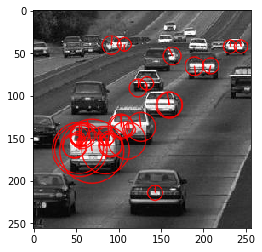

In [128]:

image = cv2.imread('hw2_data/Problem3/train-10/Highway/image_0028.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape, type(gray))
surf = cv2.xfeatures2d.SURF_create(11000)
(kps, descs) = surf.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

img2 = cv2.drawKeypoints(image,kps,None,(255,0,0),4)
plt.imshow(img2)
#plt.show()
plt.savefig('{}interest point.jpg'.format(len(kps)), bbox_inches='tight')

In [129]:
data = glob.glob('hw2_data/Problem3/train-10/*/*.jpg')
all_descriptors, nb_descriptors, label = compute_descriptors(data)
print(len(all_descriptors))

# kps: 416, descriptors: (416, 64)
# kps: 612, descriptors: (612, 64)
# kps: 115, descriptors: (115, 64)
# kps: 340, descriptors: (340, 64)
# kps: 244, descriptors: (244, 64)
# kps: 172, descriptors: (172, 64)
# kps: 166, descriptors: (166, 64)
# kps: 335, descriptors: (335, 64)
# kps: 464, descriptors: (464, 64)
# kps: 347, descriptors: (347, 64)
# kps: 837, descriptors: (837, 64)
# kps: 874, descriptors: (874, 64)
# kps: 783, descriptors: (783, 64)
# kps: 726, descriptors: (726, 64)
# kps: 421, descriptors: (421, 64)
# kps: 588, descriptors: (588, 64)
# kps: 653, descriptors: (653, 64)
# kps: 609, descriptors: (609, 64)
# kps: 563, descriptors: (563, 64)
# kps: 758, descriptors: (758, 64)
# kps: 211, descriptors: (211, 64)
# kps: 281, descriptors: (281, 64)
# kps: 367, descriptors: (367, 64)
# kps: 215, descriptors: (215, 64)
# kps: 462, descriptors: (462, 64)
# kps: 161, descriptors: (161, 64)
# kps: 411, descriptors: (411, 64)
# kps: 694, descriptors: (694, 64)
# kps: 479, descript

In [130]:
kmeans = KMeans(n_clusters=50, random_state=0, max_iter=5000).fit(all_descriptors)

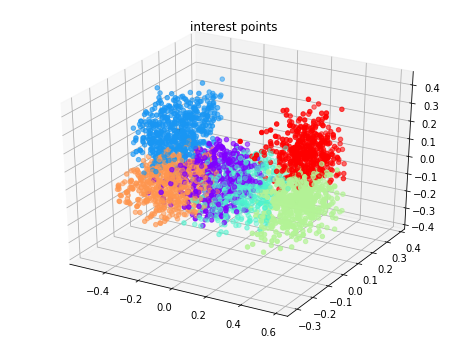

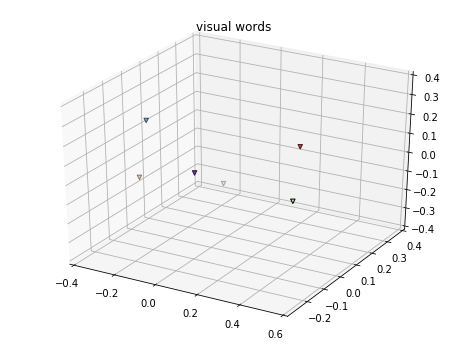

In [131]:
pca = PCA(n_components=3)
reduced_x = pca.fit_transform(all_descriptors)
center = kmeans.cluster_centers_[:6]
reduced_center = pca.transform(center)

filter_reduced_x = list(filter(lambda x : x[1] in range(6), zip(reduced_x, kmeans.labels_)))
plot_reduced_x = np.array(list(map(lambda x: x[0], filter_reduced_x)))
plot_reduced_x_label = list(map(lambda x: x[1], filter_reduced_x))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('interest points')
ax.scatter(plot_reduced_x[:,0], plot_reduced_x[:,1], plot_reduced_x[:,2],
           c=plot_reduced_x_label, cmap="rainbow")

ax.scatter(reduced_center[:,0], reduced_center[:,1], reduced_center[:,2],
           c=range(6), marker ='v', edgecolor='k', cmap="rainbow")
plt.savefig('interest points.jpg', bbox_inches='tight')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-0.4,0.6])
ax.set_ylim([-0.3,0.4])
ax.set_zlim([-0.4,0.4])
ax.set_title('visual words')
ax.scatter(reduced_center[:,0], reduced_center[:,1], reduced_center[:,2],
           c=range(6), marker ='v', edgecolor='k', cmap="rainbow")
plt.savefig('visual words.jpg', bbox_inches='tight')

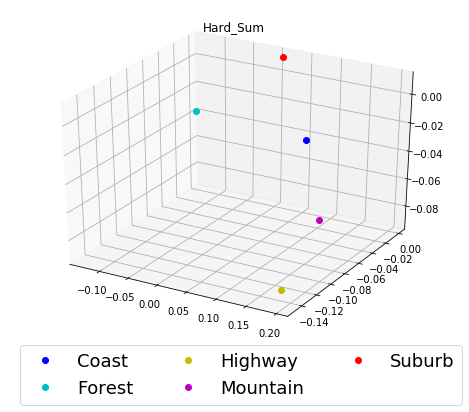

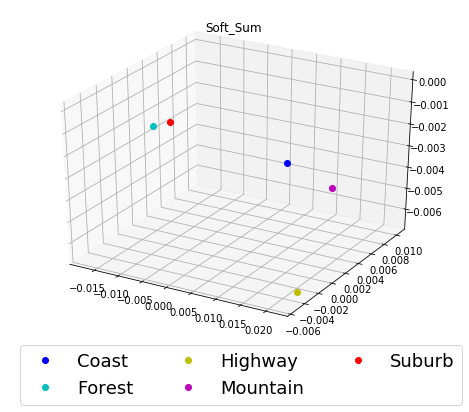

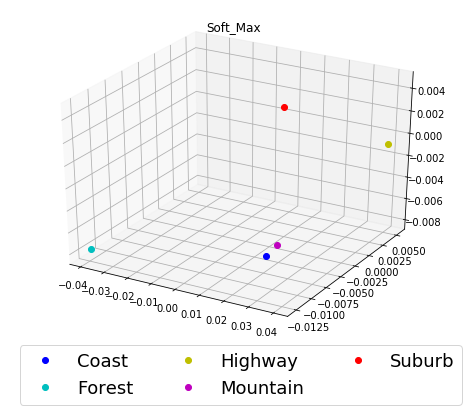

In [219]:
class_sample=[]
for i in range(5):
    class_sample.append(list(label).index(i))
    
strategy = [Hard_Sum, Soft_Sum, Soft_Max]
strategy_name = ['Hard_Sum', 'Soft_Sum', 'Soft_Max']

label_names = ['Coast', 'Forest', 'Highway', 'Mountain', 'Suburb']
colors=['b', 'c', 'y', 'm', 'r']

distance_matrix = normalize(np.reciprocal(dist.pairwise(all_descriptors, kmeans.cluster_centers_)), norm = 'l1')

for y in range(len(strategy)):
    all_img_bow = normalize(bow_feature(distance_matrix, nb_descriptors, strategy[y]), norm = 'l1')
    pca = PCA(n_components=3)
    reduced_sample_x = pca.fit_transform(all_img_bow)[class_sample]
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(strategy_name[y])
    for i in range(5):
        ax.plot([reduced_sample_x[i][0]], [reduced_sample_x[i][1]], [reduced_sample_x[i][2]], 'o', color=colors[i], label=label_names[i])

    ax.legend(loc='upper left', numpoints=1, ncol=3, fontsize=18, bbox_to_anchor=(0, 0))

    plt.savefig('class_samples_{}.jpg'.format(strategy_name[y]), bbox_inches='tight')


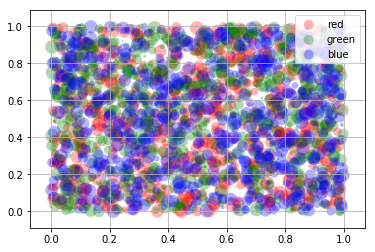

In [198]:
from numpy.random import rand
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = rand(2, n)
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In [182]:
a=np.array([1,2,3,4,5])
b=[0,3]
print(a[b])

[1 4]


In [176]:
tra_dir = 'hw2_data/Problem3/train-100/*/*.jpg'
tes_dir = 'hw2_data/Problem3/test-100/*/*.jpg'
strategy = [Hard_Sum, Soft_Sum, Soft_Max]
n_clusters=[50, 100, 200]
max_k=30

for n in n_clusters:
    tra_all_descriptors, tra_nb_descriptors, tra_label = compute_descriptors(glob.glob(tra_dir))
    tes_all_descriptors, tes_nb_descriptors, tes_label = compute_descriptors(glob.glob(tes_dir))

    tra_kmeans = KMeans(n_clusters=n, random_state=0, max_iter=5000).fit(tra_all_descriptors)

    tra_dist = DistanceMetric.get_metric('euclidean')
    tra_distance_matrix = normalize(np.reciprocal(dist.pairwise(tra_all_descriptors, tra_kmeans.cluster_centers_)), norm = 'l1')
    tes_distance_matrix = normalize(np.reciprocal(dist.pairwise(tes_all_descriptors, tra_kmeans.cluster_centers_)), norm = 'l1')

    for s in strategy:
        print('strategy : {}'.format(s))
        tra_all_img_bow = normalize(bow_feature(tra_distance_matrix, tra_nb_descriptors, s), norm = 'l1')
        tes_all_img_bow = normalize(bow_feature(tes_distance_matrix, tes_nb_descriptors, s), norm = 'l1')

        for k in range(0,max_k,2):
            neigh = KNeighborsClassifier(n_neighbors = k+1, weights='uniform', algorithm='auto')
            neigh.fit(tra_all_img_bow, tra_label) 
            y_pred = neigh.predict(tes_all_img_bow)
            print ("Accuracy is {:.1f}% for n_clusters={} and K-Value={}".format(accuracy_score(tes_label,y_pred)*100, n, k+1))


strategy : <function Hard_Sum at 0x000000000ECAE9D8>
Accuracy is 68.0% for n_clusters=50 and K-Value=1
Accuracy is 70.2% for n_clusters=50 and K-Value=3
Accuracy is 71.6% for n_clusters=50 and K-Value=5
Accuracy is 72.4% for n_clusters=50 and K-Value=7
Accuracy is 70.8% for n_clusters=50 and K-Value=9
Accuracy is 71.8% for n_clusters=50 and K-Value=11
Accuracy is 71.8% for n_clusters=50 and K-Value=13
Accuracy is 70.6% for n_clusters=50 and K-Value=15
Accuracy is 70.4% for n_clusters=50 and K-Value=17
Accuracy is 70.6% for n_clusters=50 and K-Value=19
Accuracy is 69.6% for n_clusters=50 and K-Value=21
Accuracy is 67.8% for n_clusters=50 and K-Value=23
Accuracy is 68.2% for n_clusters=50 and K-Value=25
Accuracy is 68.8% for n_clusters=50 and K-Value=27
Accuracy is 67.4% for n_clusters=50 and K-Value=29
strategy : <function Soft_Sum at 0x000000000B7BF400>
Accuracy is 69.0% for n_clusters=50 and K-Value=1
Accuracy is 69.8% for n_clusters=50 and K-Value=3
Accuracy is 70.4% for n_clusters=5

In [ ]:
print(sum([11,7,3,7,6,2,2,2,5,2,6,3,27,9,1,11,38,4,2,8,8,6,2,5,0,2,24,7,8,2,9,31,7,2,22,17,7,13,9,2,42,3,0,3,6,9,5,0,3,6]))

In [171]:
print(range(0,20,2))

range(0, 20, 2)


In [180]:
a=[4,1,1,2,3,4]
print(a.index(1))

1
